# SCIENTIFIC INVESTIGATION ON TITANIC'S CASE

## 01. IMPORTING DATA

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid') # Plots are gonna have white grids.

## 02. LOADING THE DATASET

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
combined_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
def grafico_boxplot_Out(df, coluna):
    # Cálculo dos quartis e IQR
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    mediana = df[coluna].median()
    media = df[coluna].mean()
 
    # Calculo do IQR e das Fences
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
 
    # Filtrando os dados sem outliers
    dados_filtrados = df[(df[coluna] >= lower_fence) & (df[coluna] <= upper_fence)][coluna]
 
    # Recalculando estatísticas com os dados filtrados
    minimo = dados_filtrados.min()
    maximo = dados_filtrados.max()
    mediana = dados_filtrados.median()
    media = dados_filtrados.mean()
    q1 = dados_filtrados.quantile(0.25)
    q3 = dados_filtrados.quantile(0.75)
 
    fig = go.Figure()
 
    # Boxplot sem outliers
    fig.add_trace(go.Box(
        y=dados_filtrados,
        name="",
        boxmean=True,
        boxpoints=False,  # Desativa pontos de outlier
        marker=dict(color="#1f77b4", opacity=0.6),
        line=dict(width=1.5)
    ))
 
    # Linha da média
    fig.add_shape(
        type="line",
        x0=-0.3, x1=0.3,
        y0=media, y1=media,
        line=dict(color="crimson", width=2, dash="dot"),
    )
 
    # Anotações
    anotacoes = [
        dict(x=0, y=minimo, text=f'<b>Mín:</b> {minimo:.2f}', showarrow=True, arrowhead=2, ax=-90, ay=10),
        dict(x=0, y=q1, text=f'<b>Q1:</b> {q1:.2f}', showarrow=True, arrowhead=2, ax=-90, ay=10),
        dict(x=0, y=mediana, text=f'<b>Mediana:</b> {mediana:.2f}', showarrow=True, arrowhead=2, ax=90, ay=10),
        dict(x=0, y=q3, text=f'<b>Q3:</b> {q3:.2f}', showarrow=True, arrowhead=2, ax=-90, ay=10),
        dict(x=0, y=maximo, text=f'<b>Máx:</b> {maximo:.2f}', showarrow=True, arrowhead=2, ax=-90, ay=10),
        dict(x=0.35, y=media, text=f'<b>Média:</b> {media:.2f}', showarrow=False, font=dict(color="crimson", size=13)),
    ]
 
    fig.update_layout(
        title=dict(text=f'<b>{coluna}</b>', x=0.5, xanchor='center'),
        #yaxis_title=coluna,
        yaxis=dict(gridcolor="#e0e0e0", zeroline=False),
        plot_bgcolor="white",
        paper_bgcolor="white",
        font=dict(size=13),
        width=700,
        height=500,
        showlegend=False,
        annotations=anotacoes,
        margin=dict(l=60, r=40, t=80, b=40)
    )
 
    fig.show()

grafico_boxplot_Out(train_df, train_df.columns[9])

## 03. DATASET SUMMARY

In [5]:
print("=" * 50)
print("TITANIC DISASTER DATASET SUMMARY")
print("=" * 50)

train_male = (train_df["Sex"] == "male").sum()
train_female = (train_df["Sex"] == "female").sum()

print(f"Trainning Set:  {train_df.shape[0]} Passengers ({train_male}M and {train_female}F) & {train_df.shape[1]} Features.")
print(f"Testing Set:    {test_df.shape[0]} Passengers & {test_df.shape[1]} Features.")
print(f"Combined Set:  {combined_df.shape[0]} Passengers & {combined_df.shape[1]} Features.")

print("\nFeatures:")
for i, feature in enumerate(combined_df.columns, start = 1):
    print(f"   {i:02d}. {feature}")
print("=" * 50)

TITANIC DISASTER DATASET SUMMARY
Trainning Set:  891 Passengers (577M and 314F) & 12 Features.
Testing Set:    418 Passengers & 11 Features.
Combined Set:  1309 Passengers & 12 Features.

Features:
   01. PassengerId
   02. Survived
   03. Pclass
   04. Name
   05. Sex
   06. Age
   07. SibSp
   08. Parch
   09. Ticket
   10. Fare
   11. Cabin
   12. Embarked


## 04. WHAT STORY DOES THE DATA TELL US?

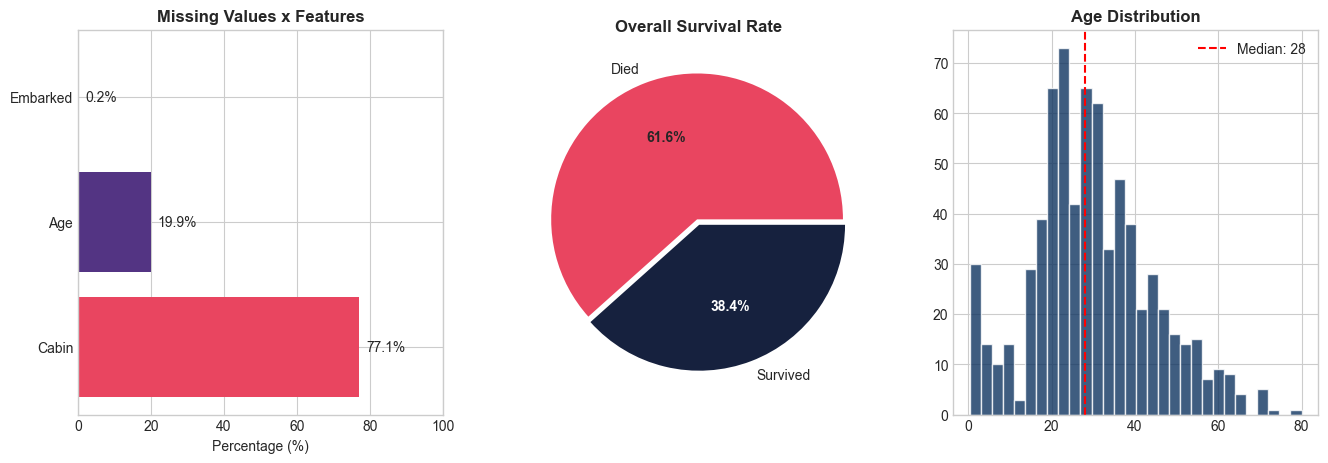

In [6]:
# Creating a 3-axes figure.
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. MISSING VALUES HEATMAP
ax1 = axes[0]
missing_data = train_df.isnull().sum().sort_values(ascending=False)
missing_pct = ( missing_data / len(train_df) * 100 ).round(2)

missing_df = pd.DataFrame({
    "Missing": missing_data,
    "Percentage": missing_pct                  
})
missing_df = missing_df[missing_df["Missing"] > 0]

colors = [
    "#e94560" if x > 50
    else
        "#533483" if x > 10
        else "#0f3460"
    for x in missing_df["Percentage"]
] # BLUE for 0 < x <= 10; PURPLE for 10 < x <= 50; and PINK for x >= 50.

bars = ax1.barh(missing_df.index, missing_df["Percentage"], color = colors)
ax1.set_title("Missing Values x Features", fontweight="bold")
ax1.set_xlabel("Percentage (%)")
ax1.bar_label(bars, fmt="%.1f%%", padding=5)
ax1.set_xlim(0, 100)

# 2. SURVIVAL DISTRIBUTION
ax2 = axes[1]
survival_counts = train_df['Survived'].value_counts()

colors_surv = ['#e94560', '#16213e']
wedges, texts, autotexts = ax2.pie(survival_counts, labels=["Died", "Survived"], autopct='%.1f%%', explode=(0.02, 0.02), colors=colors_surv)

ax2.set_title("Overall Survival Rate", fontweight="bold")
autotexts[1].set_color("white")
autotexts[0].set_fontweight("bold")
autotexts[1].set_fontweight("bold")

# 3. AGE DISTRIBUTION
ax3 = axes[2]
ax3.hist(train_df["Age"], bins=30, color="#0f3460", edgecolor="white", alpha=0.8)
ax3.axvline(train_df["Age"].median(), color="red", linestyle="--", linewidth=1.5, label = f"Median: {train_df['Age'].median():.0f}")
ax3.set_title("Age Distribution", fontweight="bold")
ax3.legend()

In [7]:
print("=" * 60)
print("QUICK STATISTICS")
print("=" * 60)
print(f"Survival Rate:    { ((train_df['Survived'] == 1).sum() / len(train_df) * 100):.2f}%")
print(f"Average Age:      { (train_df['Age'].sum() / len(train_df)):.2f}")
print(f"Average Fare:    ${ (train_df['Fare'].sum() / len(train_df)):.2f}")
print(f"Avg Family Size:  { ( train_df['SibSp'] + train_df['Parch'] + 1 ).sum() / len(train_df):.1f}")

QUICK STATISTICS
Survival Rate:    38.38%
Average Age:      23.80
Average Fare:    $32.20
Avg Family Size:  1.9


(0.0, 80.0)

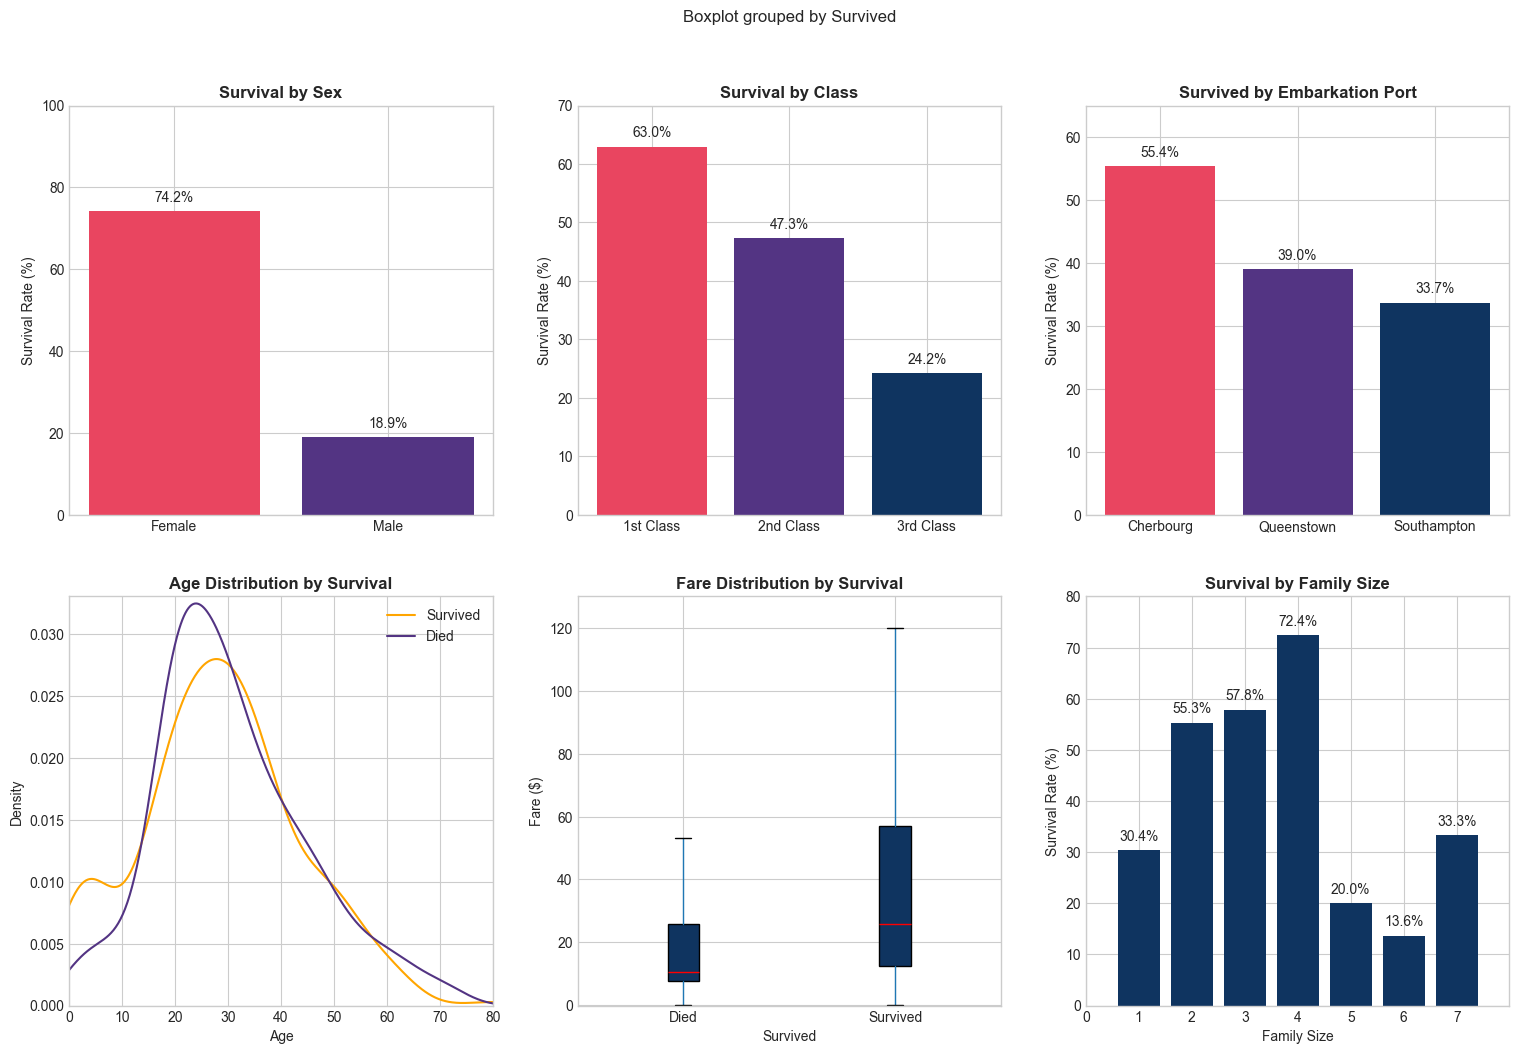

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

colors = ["#e94560", "#533483", "#0f3460"]

# 1. SURVIVAL BY SEX
ax1 = axes[0, 0]
survival_by_sex = train_df.groupby("Sex")["Survived"].mean() * 100

bars = ax1.bar(["Female", "Male"], survival_by_sex.values, color = colors)
ax1.bar_label(bars, fmt = "%.1f%%", padding = 5)
ax1.set_title("Survival by Sex", fontweight = "bold")
ax1.set_ylim(0, 100)
#ax1.set_xlabel("Sex")
ax1.set_ylabel("Survival Rate (%)")

# 2. SURVIVAL BY PASSENGER CLASS
ax2 = axes[0, 1]
survival_by_pclass = train_df.groupby("Pclass")["Survived"].mean() * 100

bars = ax2.bar(["1st Class", "2nd Class", "3rd Class"], survival_by_pclass.values, color = colors)
ax2.bar_label(bars, fmt = "%.1f%%", padding = 5)
ax2.set_title("Survival by Class", fontweight = "bold")
ax2.set_ylim(0, 70)
#ax2.set_xlabel("Classes")
ax2.set_ylabel("Survival Rate (%)")

# 3. SURVIVED BY EMBARKED
ax3 = axes[0, 2]
survival_by_embarked = train_df.groupby("Embarked")["Survived"].mean() * 100

bars = ax3.bar(["Cherbourg", "Queenstown", "Southampton"], survival_by_embarked.values, color = colors)
ax3.bar_label(bars, fmt = "%.1f%%", padding = 5)
ax3.set_title("Survived by Embarkation Port", fontweight = "bold")
ax3.set_ylabel("Survival Rate (%)")
ax3.set_ylim(0, 65)

# 4. SURVIVAL BY AGE (KDE DISTRIBUTION)
ax4 = axes[1, 0]
# survival_by_age = train_df.groupby("Age")["Survived"].mean() * 100

train_df[ train_df["Survived"] == 1 ]["Age"].dropna().plot(kind = "kde", ax = ax4, label = "Survived", color = "orange")
ax4.set_title("Age Distribution by Survival", fontweight = "bold")

train_df[ train_df["Survived"] == 0 ]["Age"].dropna().plot(kind = "kde", ax = ax4, label = "Died", color = "#533483")
ax4.set_title("Age Distribution by Survival", fontweight = "bold")

ax4.legend()
ax4.set_xlabel("Age")
ax4.set_xlim(0, 80)
ax4.set_ylim(0, 0.033)

# 5. FARE DISTRIBUTION BY SURVIVAL (BOXPLOT DISTRIBUTION)
ax5 = axes[1, 1]

train_df.boxplot( column = "Fare", by = "Survived",
                  ax = ax5, patch_artist=True,
                  boxprops = dict(facecolor = "#0f3460"),
                  medianprops = dict(color = "red"),
                  showfliers = False
                )
ax5.set_title("Fare Distribution by Survival", fontweight = "bold")
ax5.set_ylabel("Fare ($)")
ax5.set_xticklabels(["Died", "Survived"])
ax5.set_ylim(-0.1, 130)

# 6. SURVIVAL BY FAMILY SIZE
ax6 = axes[1, 2]
survival_by_fsize = train_df.groupby( train_df["SibSp"] + train_df["Parch"] + 1 )["Survived"].mean() * 100

bars = ax6.bar(survival_by_fsize.index, survival_by_fsize.values, color = "#0f3460")
ax6.bar_label(bars, fmt = "%.1f%%", padding = 5)
ax6.set_title("Survival by Family Size", fontweight = "bold")
ax6.set_xlabel("Family Size")
ax6.set_ylabel("Survival Rate (%)")
ax6.set_xlim(0, 7.99)
ax6.set_ylim(0, 80)

## 05. DRAFT

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pivot = train_df.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="mean") * 100
sns.heatmap(pivot, ax = axes[0], annot=True, fmt=".1f", cmap = "RdYlGn",
           cbar_kws = {"label" : "Survival Rate (%)"},
           annot_kws = {"weight" : "bold"}
           )
axes[0].set_title("Survival Rate Heatmap: Sex x Class", fontweight = "bold", fontsize = 14)
axes[0].set_xticklabels(["1st Class", "2nd Class", "3rd Class"])
axes[0].set_yticklabels(["Male", "Female"])

## 